#                                                   Major Project - Wine Quality Analysis
#                                                                   Corizo
                                              
                
                
Submitted by:-

Gropu 10 

1.BEJUGAM KATHYAYINI    -        8106405632	

2.P.Raghasudha          -        9490420393	

3.Yerraguntla Likhitha	-        7799941113	

4.Hardhik poosa	        -        9515129382	

5.Nilesh Baraskar	    -        9098512199	
                
      

In [1]:
#import all library which required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


In [4]:
#Upload the dataset

df = pd.read_csv('C:/Users/cws/OneDrive/Desktop/Corico Data/1788410-1767134-1729261-1613779-Red_wine.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
#df.shape

(1599, 12)

In [9]:
#Check the missing value in the data set
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [17]:
#drop all the null values
Df=df.dropna()

In [20]:
#To check again missing value
Df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis

In [22]:
Df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


<Figure size 1200x600 with 0 Axes>

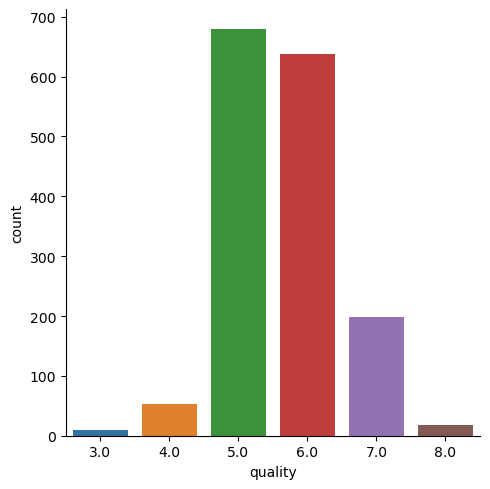

In [70]:
#To check number of values 
plt.figure(figsize=(12,6))
sns.catplot(x='quality', data=Df, kind='count')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

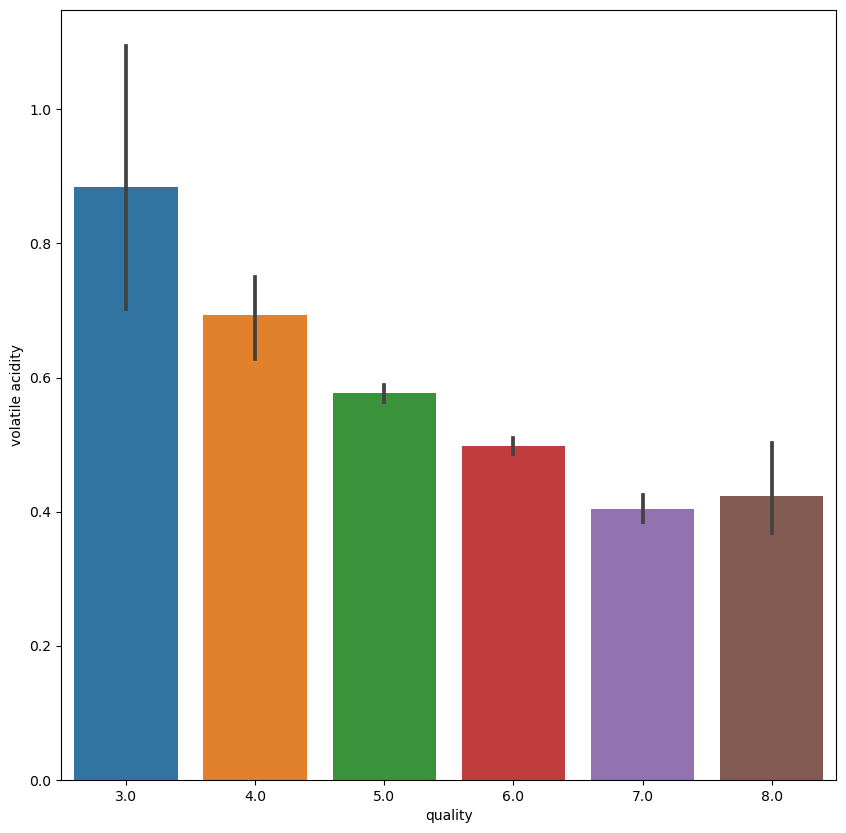

In [66]:
#volatil acidity vs quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='volatile acidity', data = Df)

<Axes: xlabel='quality', ylabel='citric acid'>

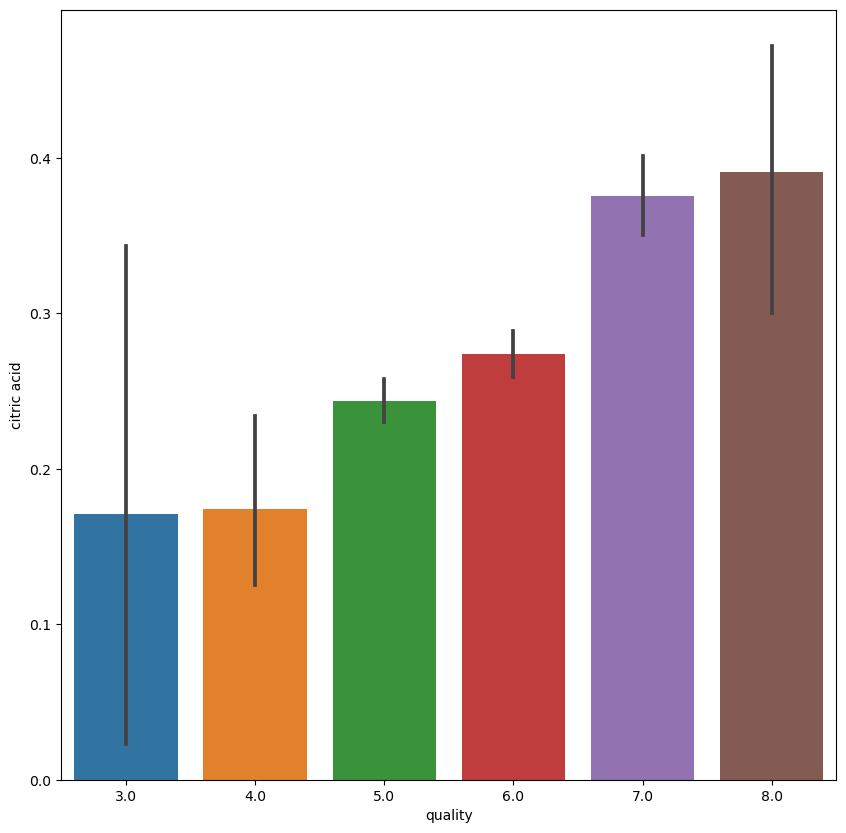

In [76]:
#volatil acidity vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='citric acid', data = df)

In [72]:
#correlation between variables 
correlation = df.corr()

<Axes: >

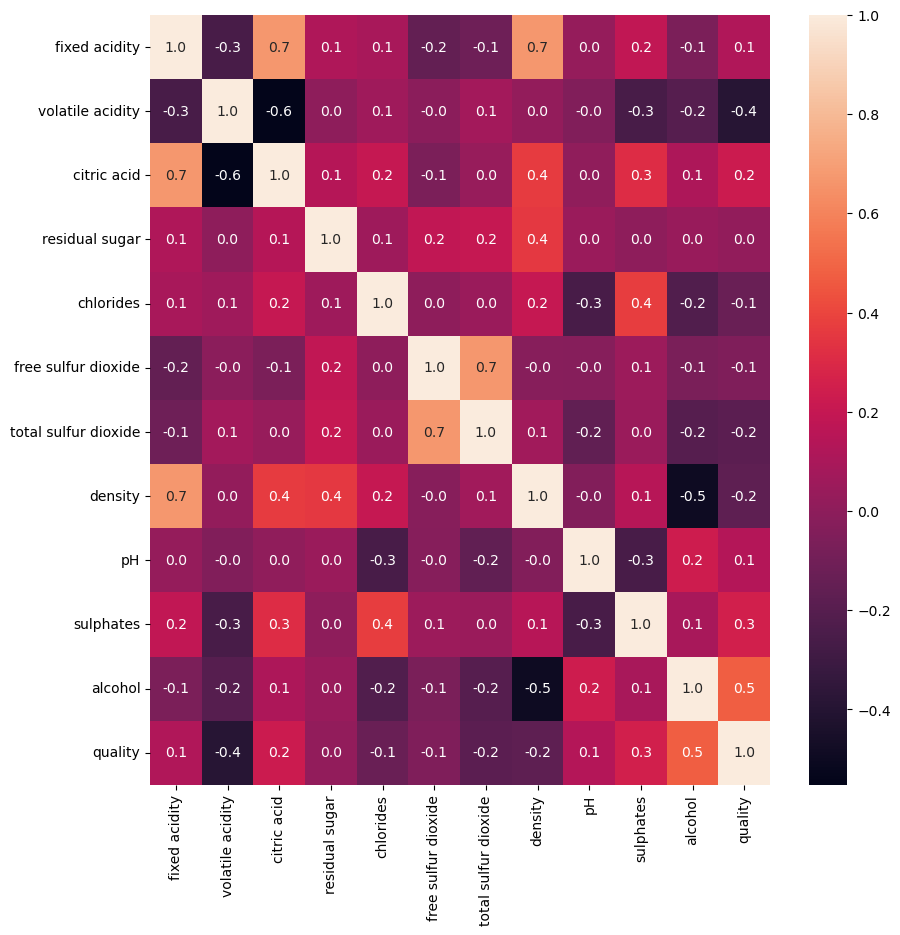

In [73]:
#constructing heatmap to see the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, fmt = '0.1f')

# Data Processing

In [78]:
#seprate the data and label
x=df.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [79]:
#Label encoding
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64


# Train & Test Split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 3)
print(y.shape, y_train.shape, y_test.shape)

(1596,) (1276,) (320,)


# Model Training : Random Forest# Model Training : Random Forest

In [81]:
model = RandomForestClassifier()

In [82]:
from colorsys import yiq_to_rgb
model.fit(x_train, y_train)

RandomForestClassifier()

# Model evaluation

In [83]:
#Accuracy Score
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print('Accuracy: ', test_data_accuracy)

Accuracy:  0.909375


# Building a Prediction System

In [85]:
input_data = (7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5)

#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[1]
Good Quality Wine


Thanks